<a href="https://colab.research.google.com/github/ibonetc/IA_2024/blob/main/IA_FuzzySystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sistemas de inferencia borroso

In [ ]:
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 20.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894079 sha256=ed46a36b1b19b82b1410746a06edf9a19bad676e865a9104bb398615bf28f51a
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl

## Ejemplo: Controlador de velocidad de un ventilador

Suponga que se desea desarrollar el siguiente sistema:

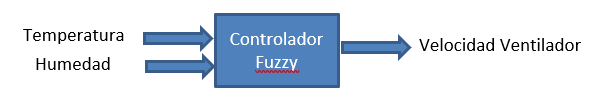

Supongamos que tenemos un sistema hipotético, muy sencillo, sólo con propósitos de entender cómo funciona un sistema de inferencia fuzzy. El sistema controla la velocidad de un ventilador de acuerdo con la temperatura y la humedad del ambiente. Por tanto, nuestro sistema consta de dos entradas, temperatura y humedad y una única salida, que es la velocidad del ventilador.

*  Temperatura: [10,40]
*  Humedad: [20,100]
*  Velocidad: [0,100]

### Crear las variables fuzzy y sus conjuntos borrosos

In [ ]:
universe_temp=np.arange(10, 40, 0.5)
universe_hum=np.arange(20, 100, 1)
universe_vel=np.arange(0, 100, 1)
temperatura = ctrl.Antecedent(universe_temp, 'temperatura')
humedad = ctrl.Antecedent(universe_hum, 'humedad')
velocidad = ctrl.Consequent(universe_vel, 'velocidad')

Para hacer el ejemplo rápido vamos a generar las variables automáticamente, teniendo en cuenta los siguientes conjuntos borrosos para cada una de las variables:

* Temperatura: Fría, Media, Caliente

* Humedad: Seca, Normal, Húmeda

* Velocidad: Lenta, Moderada, Rápida



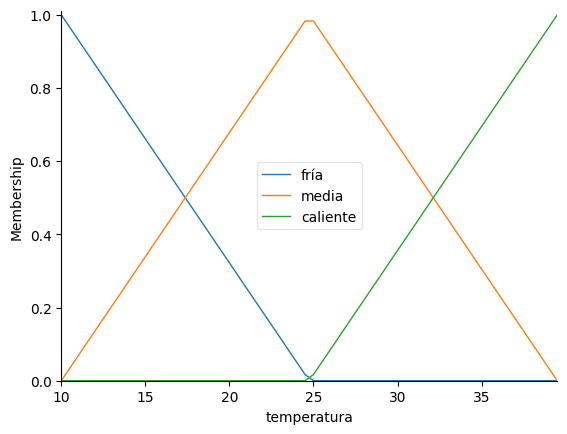

In [ ]:
v_temperatura = ['fría', 'media', 'caliente']
temperatura.automf(names=v_temperatura)
temperatura.view()

In [ ]:
v_temperatura = ['fría', 'media', 'caliente']
v_humedad = ['seca', 'normal', 'húmeda']
v_velocidad = ['lenta', 'moderada', 'rápida']

temperatura.automf(names=v_temperatura)
humedad.automf(names=v_humedad)

velocidad["lenta"] = fuzz.trimf(universe_vel, [0, 0, 50])
velocidad["moderada"] = fuzz.trapmf(universe_vel, [10, 40, 60, 90])
velocidad["rápida"] = fuzz.trimf(universe_vel, [50, 100, 100])

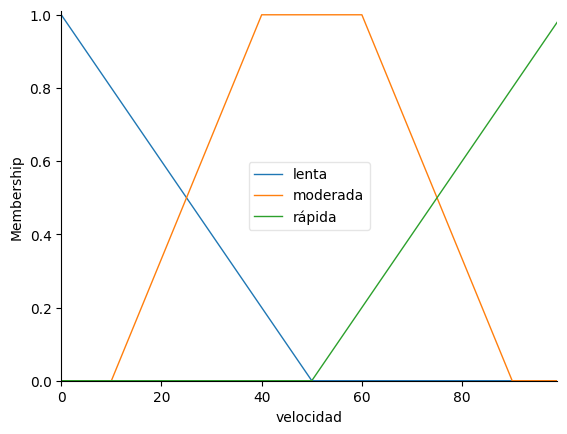

In [ ]:
v_velocidad = ['lenta', 'moderada', 'rápida']
velocidad["lenta"] = fuzz.trimf(universe_vel, [0, 0, 50])
velocidad["moderada"] = fuzz.trapmf(universe_vel, [10, 40, 60, 90])
velocidad["rápida"] = fuzz.trimf(universe_vel, [50, 100, 100])
velocidad.view()

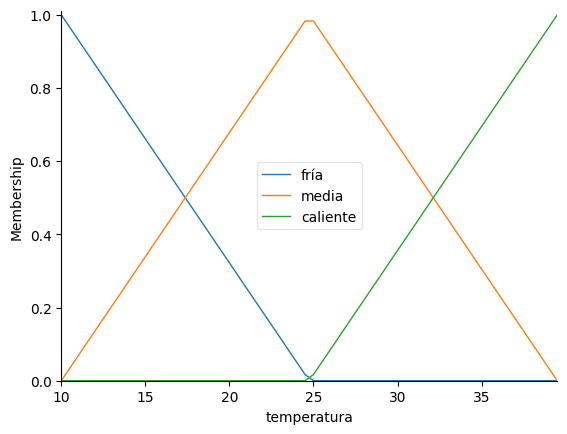

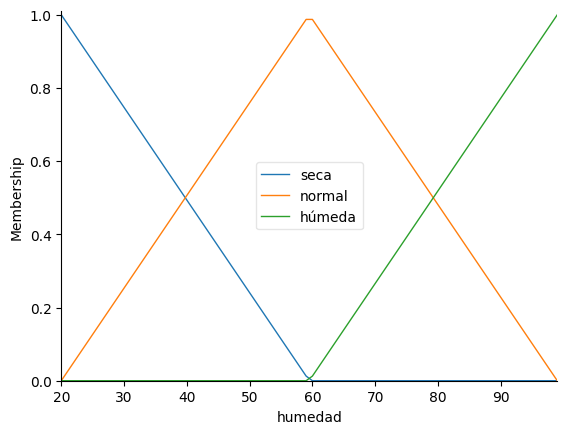

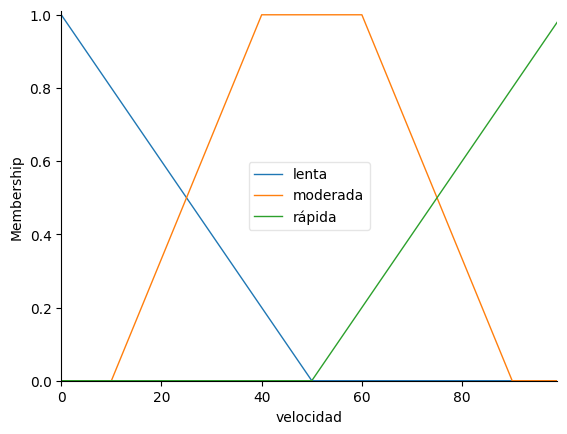

In [ ]:
temperatura.view()
humedad.view()
velocidad.view()

### Adicionar las reglas al sistema
Considerando las siguientes reglas:

<table style="height: 230px; margin-left: auto; margin-right: auto;" border="black" width="507"><tbody><tr><td style="width: 94px;">&nbsp;</td><td style="width: 94px;">&nbsp;</td><td style="width: 95px; text-align: center;" colspan="3"><strong>Temperatura</strong><br /><br /><br /></td></tr><tr><td style="width: 94px;">&nbsp;</td><td style="width: 94px;">&nbsp;</td><td style="width: 95px; text-align: center;"><strong>Fr&iacute;a</strong></td><td style="width: 95px; text-align: center;"><strong>Media</strong></td><td style="width: 95px; text-align: center;"><strong>Caliente</strong></td></tr><tr><td style="width: 94px; text-align: center;" rowspan="3"><strong>Humedad</strong><br /><br /><br /></td><td style="width: 94px; text-align: center;"><strong>Seca</strong></td><td style="width: 95px; text-align: center;">Moderada</td><td style="width: 95px; text-align: center;">R&aacute;pida</td><td style="width: 95px; text-align: center;">R&aacute;pida</td></tr><tr><td style="width: 94px; text-align: center;"><strong>Normal</strong></td><td style="width: 95px; text-align: center;">Lenta</td><td style="width: 95px; text-align: center;">Moderada</td><td style="width: 95px; text-align: center;">R&aacute;pida</td></tr><tr><td style="width: 94px; text-align: center;"><strong>H&uacute;meda</strong></td><td style="width: 95px; text-align: center;">Lenta</td><td style="width: 95px; text-align: center;">Lenta</td><td style="width: 95px; text-align: center;">Moderada</td></tr></tbody></table>


In [ ]:
rule1 = ctrl.Rule(
    antecedent=(
        (temperatura['fría'] & humedad['normal']) |
        (temperatura['fría'] & humedad['húmeda']) |
        (temperatura['media'] & humedad['húmeda'])
        ),
    consequent=velocidad['lenta'], label='rule_lenta')

rule2 = ctrl.Rule(
    antecedent=(
        (temperatura['fría'] & humedad['seca']) |
        (temperatura['media'] & humedad['normal']) |
        (temperatura['caliente'] & humedad['húmeda'])
        ),
    consequent=velocidad['moderada'], label='rule_mod')
rule3 = ctrl.Rule(
    antecedent=(
        (temperatura['media'] & humedad['seca']) |
        (temperatura['caliente'] & humedad['seca']) |
        (temperatura['caliente'] & humedad['normal'])
        ),
    consequent=velocidad['rápida'], label='rule_rap')

### Crear el sistema de inferencia

In [ ]:
reglas = ctrl.ControlSystem(rules=[rule1, rule2, rule3])
fis_ventilador = ctrl.ControlSystemSimulation(reglas)

### Inferencia de un valor utilizando el sistema

Para los valores de activación de temperatura = 18 grados y humedad = 60%

Analicemos primero los valores de membresía de las funciones de membresía

Para temperatura

42.49634524741769


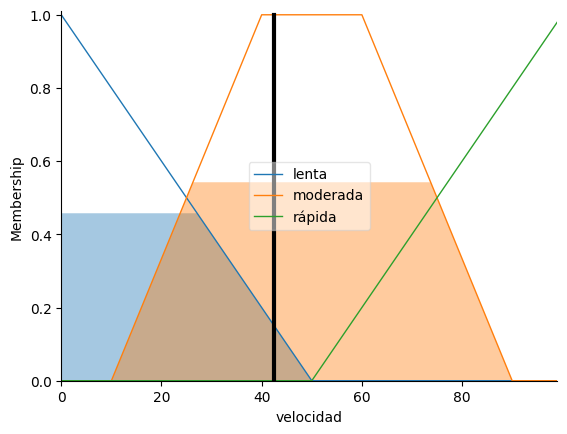

In [ ]:
fis_ventilador.input['temperatura'] = 18
fis_ventilador.input['humedad'] = 60
fis_ventilador.compute()
print(fis_ventilador.output['velocidad'])
velocidad.view(sim=fis_ventilador)

Utilizando el ctrl de este paquete no se puede cambiar el método de defuzzicación, sino que por defecto está el centroide.

### Simulación con 100*100 corridas y entradas aleatorias

In [ ]:
sim = ctrl.ControlSystemSimulation(reglas)

In [ ]:
temp_ex = np.linspace(10, 40, 100)
hum_ex=np.linspace(20, 100, 100)
x, y = np.meshgrid(temp_ex, hum_ex)

In [ ]:
print(temp_ex.size, x.shape)

100 (100, 100)


In [ ]:
z = np.zeros((temp_ex.size,hum_ex.size))
z.shape

(100, 100)

In [ ]:
for i in range(temp_ex.size):
  for j in range(hum_ex.size):
    sim.input['temperatura'] = x[i, j]
    sim.input['humedad'] = y[i, j]
    sim.compute()
    z[i, j] = sim.output['velocidad']

Resultado de la simulación

In [ ]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])
fig.update_layout(title='Fuzzy Simulation', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

## Entendiendo paso a paso el modelo

### Generar universo de las variables y funciones de pertenencia de los conjuntos borrosos asociados a las variables

In [ ]:
universe_temp=np.arange(10, 40, 0.5)
universe_hum=np.arange(20, 100, 1)
universe_vel=np.arange(0, 100, 1)

In [ ]:
v_temperatura = ['fría', 'media', 'caliente']
v_humedad = ['seca', 'normal', 'húmeda']
v_velocidad = ['lenta', 'moderada', 'rápida']

In [ ]:
temp_fria=fuzz.trimf(universe_temp, [10,10,25])
temp_media= fuzz.trapmf(universe_temp, [15,23,28,35])
temp_caliente= fuzz.trimf(universe_temp,[25,40,40])
fuzzy_temp=[temp_fria,temp_media,temp_caliente]

Text(0, 0.5, 'Membresía')

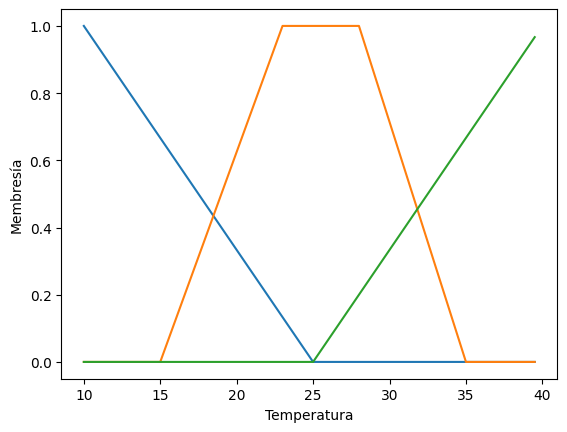

In [ ]:
plt.figure()
plt.plot(universe_temp,temp_fria,label='fría')
plt.plot(universe_temp,temp_media, label='media')
plt.plot(universe_temp,temp_caliente, label='caliente')
plt.xlabel('Temperatura')
plt.ylabel('Membresía')

In [ ]:
hum_seca=fuzz.trimf(universe_hum, [20,20,50])
hum_normal= fuzz.trapmf(universe_hum, [30,50,60,90])
hum_hum= fuzz.trimf(universe_hum,[60,100,100])
fuzzy_hum=[hum_seca,hum_normal,hum_hum]

In [ ]:
def plot_membfunction(universe, fuzzysets, namesfuzzysets,namevariable=''):
  plt.figure()
  for fset,n in zip (fuzzysets,namesfuzzysets):
    plt.plot(universe,fset,label=n)
  plt.xlabel(namevariable)
  plt.ylabel('Membresía')
  plt.show()

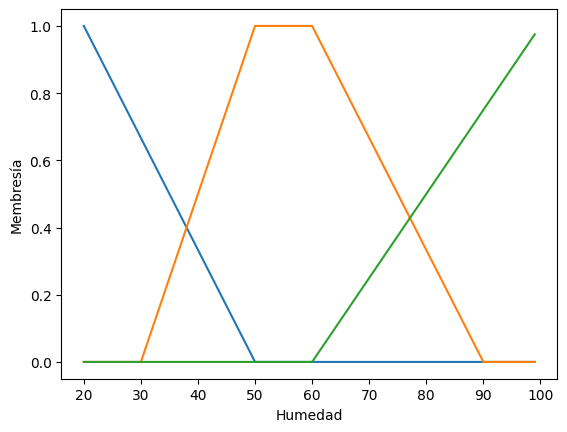

In [ ]:
plot_membfunction(universe_hum, fuzzy_hum, v_humedad,namevariable='Humedad')

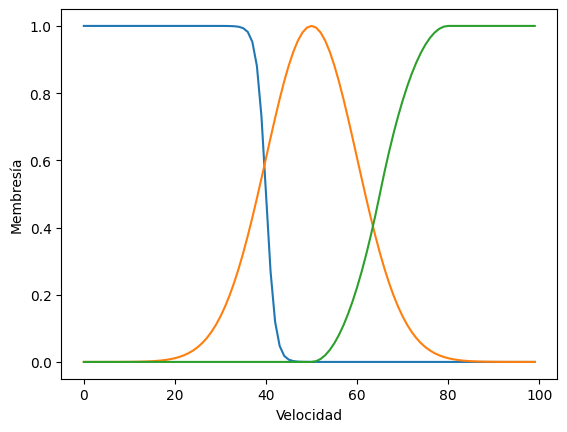

In [ ]:
vel_lenta=fuzz.sigmf(universe_vel, 40,-1)
vel_mod= fuzz.gaussmf(universe_vel, 50,10)
vel_rap= fuzz.pimf(universe_vel,50, 80, 100, 100)
fuzzy_vel=[vel_lenta,vel_mod,vel_rap]
plot_membfunction(universe_vel, fuzzy_vel, v_velocidad,namevariable='Velocidad')

Suponiendo que vamos a aplicar las reglas a un problema determinado, por ejemplo temperatura = 18 grados y humedad = 60%.

Vamos a hacer el proceso de operaciones de aplicación de OR y de AND según corresponda en las reglas que tenemos.

<table style="height: 230px; margin-left: auto; margin-right: auto;" border="black" width="507"><tbody><tr><td style="width: 94px;">&nbsp;</td><td style="width: 94px;">&nbsp;</td><td style="width: 95px; text-align: center;" colspan="3"><strong>Temperatura</strong><br /><br /><br /></td></tr><tr><td style="width: 94px;">&nbsp;</td><td style="width: 94px;">&nbsp;</td><td style="width: 95px; text-align: center;"><strong>Fr&iacute;a</strong></td><td style="width: 95px; text-align: center;"><strong>Media</strong></td><td style="width: 95px; text-align: center;"><strong>Caliente</strong></td></tr><tr><td style="width: 94px; text-align: center;" rowspan="3"><strong>Humedad</strong><br /><br /><br /></td><td style="width: 94px; text-align: center;"><strong>Seca</strong></td><td style="width: 95px; text-align: center;">Moderada</td><td style="width: 95px; text-align: center;">R&aacute;pida</td><td style="width: 95px; text-align: center;">R&aacute;pida</td></tr><tr><td style="width: 94px; text-align: center;"><strong>Normal</strong></td><td style="width: 95px; text-align: center;">Lenta</td><td style="width: 95px; text-align: center;">Moderada</td><td style="width: 95px; text-align: center;">R&aacute;pida</td></tr><tr><td style="width: 94px; text-align: center;"><strong>H&uacute;meda</strong></td><td style="width: 95px; text-align: center;">Lenta</td><td style="width: 95px; text-align: center;">Lenta</td><td style="width: 95px; text-align: center;">Moderada</td></tr></tbody></table>


Primero calcularemos el valor de membresía que significa 18 grados en cada conjunto borroso de temperatura y 60% de humedad en cada conjunto borroso de humedad.

In [ ]:
mf_temperatura=[fuzz.interp_membership(universe_temp, t,18) for t in fuzzy_temp]
mf_humedad=[fuzz.interp_membership(universe_hum, h,60) for h in fuzzy_hum]
print(mf_temperatura)
print(mf_humedad)

[0.4666666666666667, 0.375, 0.0]
[0.0, 1.0, 0.0]


En las reglas, el OR significa realizar una operación de max en los conjuntos y el AND de min
Por ejemplo regla 1:

```
IF (temperatura['fría'] & humedad['normal']) |
    (temperatura['fría'] & humedad['húmeda']) |
    (temperatura['media'] & humedad['húmeda'])
  )
then velocidad['lenta']
```



In [ ]:
v_temperatura

['fría', 'media', 'caliente']

In [ ]:
mf_temperatura[v_temperatura.index("fría")]

0.4666666666666667

0.4666666666666667 0.0 0.0
0.4666666666666667


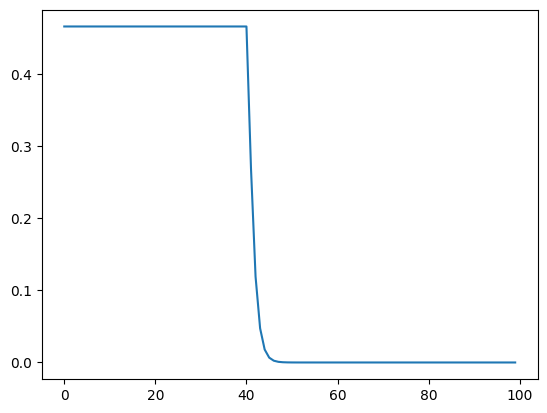

In [ ]:
rule1_ant1= np.fmin(mf_temperatura[v_temperatura.index("fría")],mf_humedad[v_humedad.index('normal')])
rule1_ant2= np.fmin(mf_temperatura[v_temperatura.index("fría")],mf_humedad[v_humedad.index('húmeda')])
rule1_ant3= np.fmin(mf_temperatura[v_temperatura.index("media")],mf_humedad[v_humedad.index('húmeda')])
rule1_ant= np.max([rule1_ant1,rule1_ant2,rule1_ant3])
act_rule1= np.fmin(rule1_ant, vel_lenta)
print(rule1_ant1,rule1_ant2,rule1_ant3)
print(rule1_ant)
plt.plot(act_rule1)

Otra vía de cacular la activación de la regla, o sea cortar el conjunto borroso del consecuente con el grado de pertenecia obtenido en la combinación de los antecedentes, puede ser con **fuzz.relation_min**

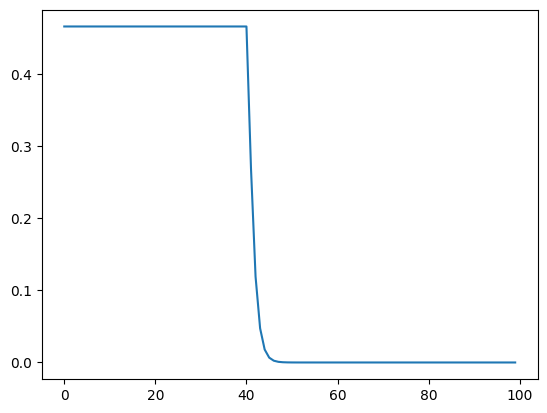

In [ ]:
act_rule1_2=fuzz.relation_min([rule1_ant],vel_lenta)[0].T
plt.plot(act_rule1_2)

```
If( (temperatura['fría'] & humedad['seca']) |
    (temperatura['media'] & humedad['normal']) |
    (temperatura['caliente'] & humedad['húmeda'])
    )
then
    velocidad['moderada']
```




0.0 0.375 0.0
0.375


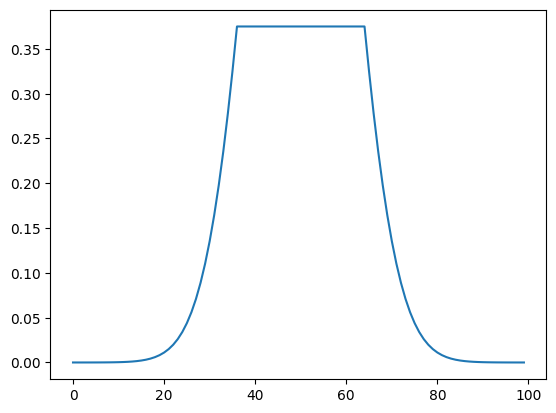

In [ ]:
rule2_ant1= np.fmin(mf_temperatura[v_temperatura.index("fría")],mf_humedad[v_humedad.index('seca')])
rule2_ant2= np.fmin(mf_temperatura[v_temperatura.index("media")],mf_humedad[v_humedad.index('normal')])
rule2_ant3= np.fmin(mf_temperatura[v_temperatura.index("caliente")],mf_humedad[v_humedad.index('húmeda')])
rule2_ant= np.max([rule2_ant1,rule2_ant2,rule2_ant3])
act_rule2= np.fmin(rule2_ant, vel_mod)
print(rule2_ant1,rule2_ant2,rule2_ant3)
print(rule2_ant)
plt.plot(act_rule2)

```
If( (temperatura['media'] & humedad['seca']) |
    (temperatura['caliente'] & humedad['seca']) |
    (temperatura['caliente'] & humedad['normal'])
    ),
then velocidad['rápida']
```



0.0 0.0 0.0
0.0


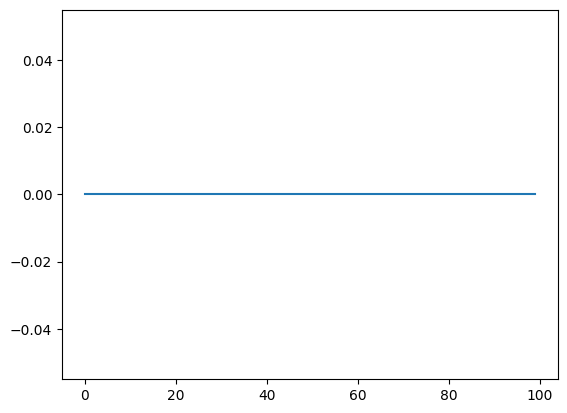

In [ ]:
rule3_ant1= np.fmin(mf_temperatura[v_temperatura.index("media")],mf_humedad[v_humedad.index('seca')])
rule3_ant2= np.fmin(mf_temperatura[v_temperatura.index("caliente")],mf_humedad[v_humedad.index('seca')])
rule3_ant3= np.fmin(mf_temperatura[v_temperatura.index("caliente")],mf_humedad[v_humedad.index('normal')])
rule3_ant= np.max([rule3_ant1,rule3_ant2,rule3_ant3])
act_rule3= np.fmin(rule3_ant, vel_rap)
print(rule3_ant1,rule3_ant2,rule3_ant3)
print(rule3_ant)
plt.plot(act_rule3)

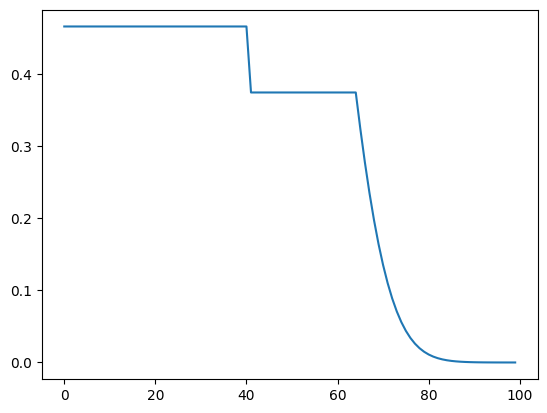

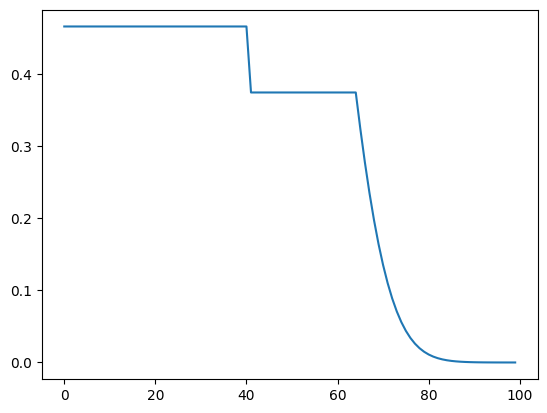

In [ ]:
yr1_r2, unionr1_r2=fuzz.fuzzy_or(universe_vel, act_rule1, universe_vel, act_rule2)
y,union=fuzz.fuzzy_or(universe_vel, unionr1_r2, universe_vel, act_rule3)
plt.plot(unionr1_r2)
plt.figure()
plt.plot(union)

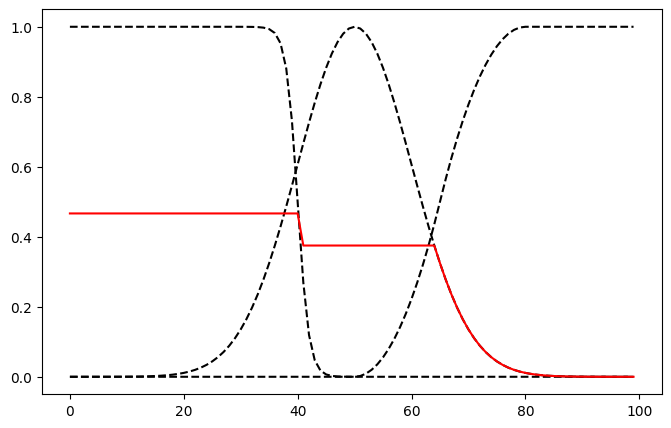

In [ ]:
x=universe_vel
plt.figure(figsize=(8, 5))
plt.plot(x,vel_lenta, 'k',linestyle='dashed')
plt.plot(x,vel_mod, 'k',linestyle='dashed')
plt.plot(x,vel_rap, 'k',linestyle='dashed')
plt.plot(x,union, 'r')

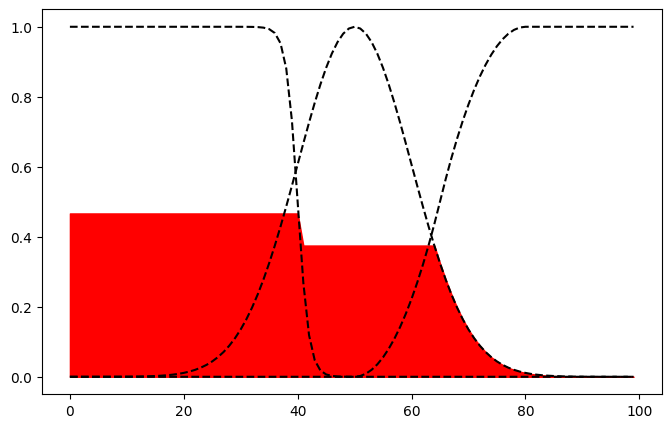

In [ ]:
x=universe_vel
plt.figure(figsize=(8, 5))
plt.plot(x,vel_lenta, 'k',linestyle='dashed')
plt.plot(x,vel_mod, 'k',linestyle='dashed')
plt.plot(x,vel_rap, 'k',linestyle='dashed')
plt.fill_between(universe_vel,0,union, color='red')

In [ ]:
x=universe_vel
defuzz_centroid = fuzz.defuzz(x, union, 'centroid')
ymax = fuzz.interp_membership(x, union, defuzz_centroid)
print(defuzz_centroid)
#print(ymax)

33.026040744659745


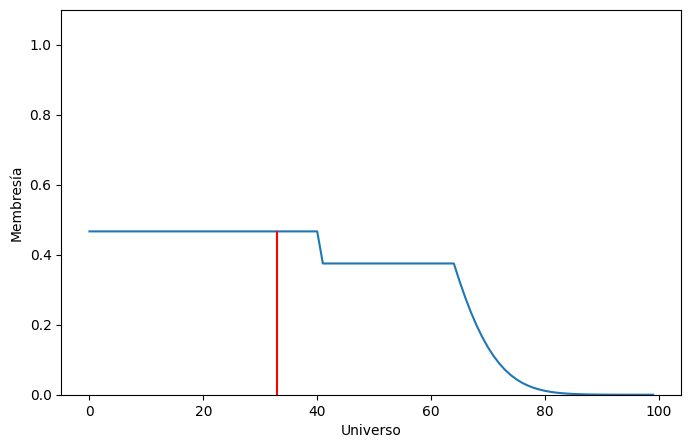

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(x, union)
plt.vlines(defuzz_centroid, 0, ymax, color='r')
plt.ylabel('Membresía')
plt.xlabel('Universo')
plt.ylim(0, 1.1)
plt.show()

## Ejemplo: Problema de la propina
Nota: Ejemplo tomado del tutorial

Crear un sistema de control difuso que modele cómo podrías elegir dar propina en un restaurante.

A la hora de dar propina, se tiene en cuenta el servicio y la calidad de la comida, valorada entre 0 y 10. Utilice ésta para dejar una propina entre 0 y 25%.

***Antecedentes(entradas)***

*   **Servicio**
  > Universo: [0, 10] (¿Qué tan bueno fue el servicio de los camareros, en una escala de 0 a 10?)

  > Conjunto difuso: pobre, aceptable, sorprendente
*   **calidad de la comida**
  >Universo: [0, 10] (¿Qué tan sabrosa fue la comida, en una escala de 0 a 10?)

  >Conjunto difuso: mala, decente, genial

***Consecuentes (salidas)***

*   **propina**
  > Universo:[0, 25] (¿Cuánto deberíamos dar de propina, entre 0% y 25%?)

  > Conjunto difuso: baja, media, alta



In [ ]:
universe = np.arange(-2, 2, 0.1)

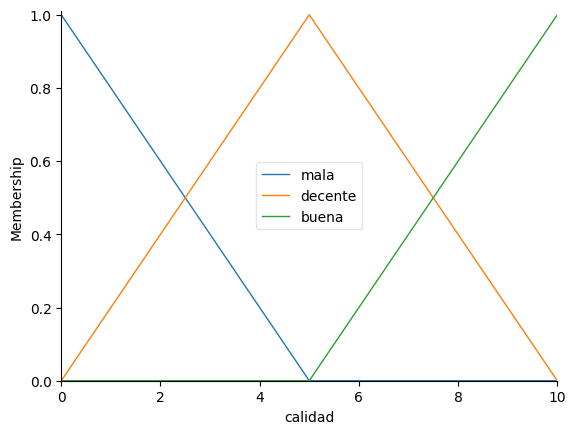

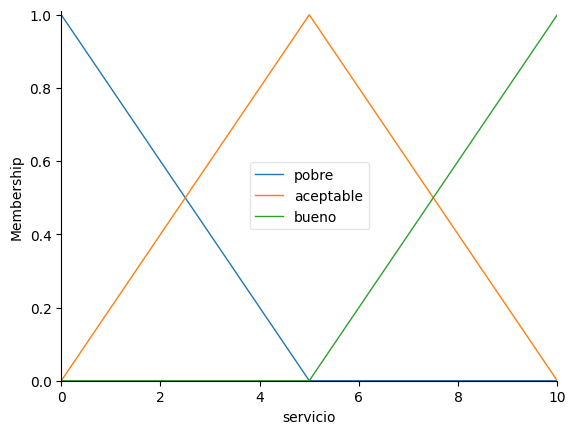

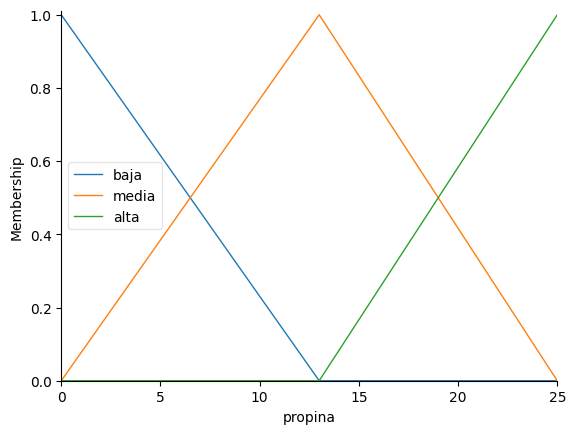

In [ ]:
calidad = ctrl.Antecedent(np.arange(0, 11, 1), "calidad")
servicio = ctrl.Antecedent(np.arange(0, 11, 1), "servicio")
propina = ctrl.Consequent(np.arange(0, 26, 1), "propina")

calidad.automf(names=['mala','decente','buena'])
servicio.automf(names=['pobre','aceptable','bueno'])

propina["baja"] = fuzz.trimf(propina.universe, [0, 0, 13])
propina["media"] = fuzz.trimf(propina.universe, [0, 13, 25])
propina["alta"] = fuzz.trimf(propina.universe, [13, 25, 25])

calidad.view()
servicio.view()
propina.view()

(<Figure size 640x480 with 1 Axes>, <Axes: >)

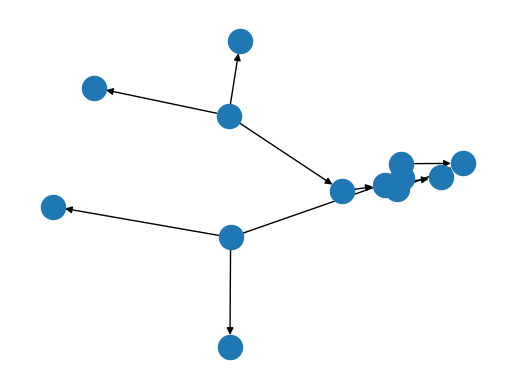

In [ ]:
R1 = ctrl.Rule(calidad['mala'] & servicio['pobre'],propina['baja'])
R2 = ctrl.Rule(calidad['mala'] & servicio['aceptable'],propina['baja'])
R3 = ctrl.Rule(calidad['mala'] & servicio['bueno'],propina['media'])
R4 = ctrl.Rule(calidad['decente'] & servicio['pobre'],propina['media'])
R5 = ctrl.Rule(calidad['decente'] & servicio['aceptable'],propina['alta'])
R6 = ctrl.Rule(calidad['decente'] & servicio['bueno'],propina['alta'])
R7 = ctrl.Rule(calidad['buena'] & servicio['pobre'],propina['baja'])
R8 = ctrl.Rule(calidad['buena'] & servicio['aceptable'],propina['alta'])
R9 = ctrl.Rule(calidad['buena'] & servicio['bueno'],propina['alta'])

R1.view()

### Crear sistema de inferencia

In [ ]:
reglas = ctrl.ControlSystem([R1,R2,R3,R4,R5,R6,R7,R8,R9])
fis_propina = ctrl.ControlSystemSimulation(reglas)

### Evaluación del sistema
Suponiendo que queremos evaluar el sistema para una entrada de calidad=6.5 y servicio= 9.8.

In [ ]:
fis_propina.input['calidad'] = 6.5
fis_propina.input['servicio'] = 9.8
fis_propina.compute()

In [ ]:
print(fis_propina.output['propina'])

20.72307692307692


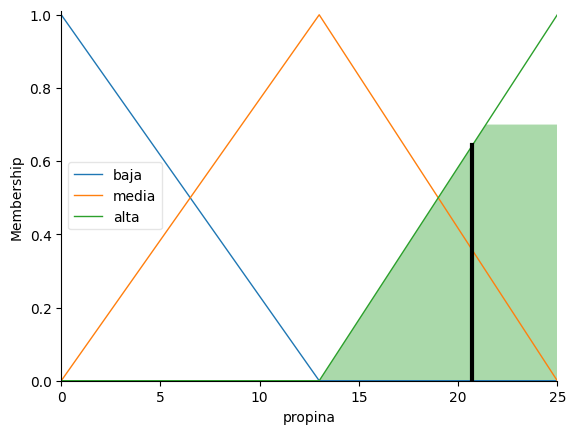

In [ ]:
propina.view(sim=fis_propina)